In [1]:
import pandas as pd
import numpy as np

In [23]:
df = pd.read_csv('Preprocessing1.csv')

In [24]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,WeekDay,Day
0,Jet Airways,Delhi,Banglore,DEL → BOM → COK,20:00,04:25 10 Jun,26h 35m,1 stop,In-flight meal not included,14924,6,Thursday,6.0
1,Jet Airways,Delhi,Cochin,DEL → BOM → COK,16:00,19:00 10 Jun,27h,1 stop,In-flight meal not included,10577,6,Sunday,9.0
2,Jet Airways,Mumbai,Hyderabad,BOM → HYD,19:35,21:05,1h 30m,non-stop,No info,5678,3,Friday,15.0
3,Multiple carriers,Delhi,Banglore,DEL → BOM → COK,18:55,01:30 16 Jun,15h 10m,1 stop,In-flight meal not included,7408,5,Monday,6.0
4,Air India,Delhi,Cochin,DEL → COK,17:10,17:55,8h 20m,non-stop,No info,6724,6,Monday,24.0


In [4]:
df['Price'].mean()

9027.895555555555

<Axes: xlabel='Month'>

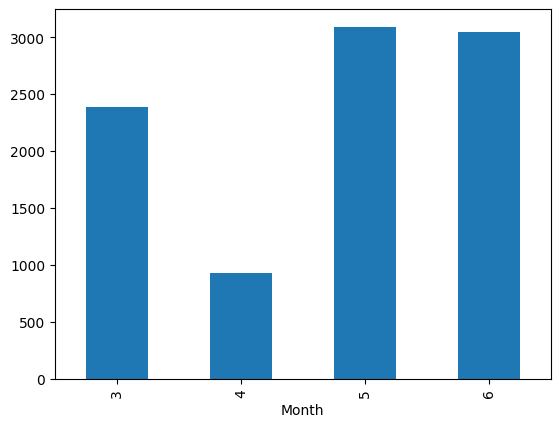

In [6]:
# Plot number of flights by month
df.groupby(['Month']).size().plot(kind='bar')

In [7]:
# plot number of flights by month
df.groupby(['Month']).count()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,WeekDay,Day
Month,,,,,,,,,,,,
3,2388,2388,2388,2388,2388,2388,2388,2334,2388,2388,2388,2335
4,926,926,926,926,926,926,926,901,926,926,926,902
5,3092,3092,3092,3091,3092,3092,3092,3029,3092,3092,3092,3004
6,3044,3044,3044,3044,3044,3044,3044,2986,3044,3044,3044,2973


In [10]:
# Find average price of flight on weekends (saturdays and sunday)
df_weekend = df[ (df['WeekDay'] == 'Saturday') | (df['WeekDay'] == 'Sunday') ]
df_weekday = df[ (df['WeekDay'] != 'Saturday') & (df['WeekDay'] != 'Sunday') ]

In [13]:
df_weekend['Price'].mean()

9058.016077170418

In [14]:
df_weekday['Price'].mean()

9015.219666215608

ANSWERS
1. 9027.89
2. MAY
3. Weekends

In [15]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,WeekDay,Day
0,Jet Airways,Delhi,Banglore,DEL → BOM → COK,20:00,04:25 10 Jun,26h 35m,1 stop,In-flight meal not included,14924,6,Thursday,6.0
1,Jet Airways,Delhi,Cochin,DEL → BOM → COK,16:00,19:00 10 Jun,27h,1 stop,In-flight meal not included,10577,6,Sunday,9.0
2,Jet Airways,Mumbai,Hyderabad,BOM → HYD,19:35,21:05,1h 30m,non-stop,No info,5678,3,Friday,15.0
3,Multiple carriers,Delhi,Banglore,DEL → BOM → COK,18:55,01:30 16 Jun,15h 10m,1 stop,In-flight meal not included,7408,5,Monday,6.0
4,Air India,Delhi,Cochin,DEL → COK,17:10,17:55,8h 20m,non-stop,No info,6724,6,Monday,24.0


In [16]:
df['Additional_Info'].replace('No Info', 'No info', inplace=True)

In [20]:
df_indigo = df[df['Airline'] == 'IndiGo']
df_indigo[df_indigo['Additional_Info'] == 'No info'].count()

Airline            1650
Source             1650
Destination        1650
Route              1650
Dep_Time           1650
Arrival_Time       1650
Duration           1650
Total_Stops        1609
Additional_Info    1650
Price              1650
Month              1650
WeekDay            1650
Day                1614
dtype: int64

In [25]:
# Convert duration to seconds
df['Duration'] = pd.to_timedelta(df['Duration']).dt.seconds
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,WeekDay,Day
0,Jet Airways,Delhi,Banglore,DEL → BOM → COK,20:00,04:25 10 Jun,9300,1 stop,In-flight meal not included,14924,6,Thursday,6.0
1,Jet Airways,Delhi,Cochin,DEL → BOM → COK,16:00,19:00 10 Jun,10800,1 stop,In-flight meal not included,10577,6,Sunday,9.0
2,Jet Airways,Mumbai,Hyderabad,BOM → HYD,19:35,21:05,5400,non-stop,No info,5678,3,Friday,15.0
3,Multiple carriers,Delhi,Banglore,DEL → BOM → COK,18:55,01:30 16 Jun,54600,1 stop,In-flight meal not included,7408,5,Monday,6.0
4,Air India,Delhi,Cochin,DEL → COK,17:10,17:55,30000,non-stop,No info,6724,6,Monday,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9445,Air India,Banglore,Cochin,BLR → MAA → DEL,19:30,19:50,32100,1 stop,In-flight meal not included,5932,6,Wednesday,12.0
9446,IndiGo,Delhi,Cochin,DEL → BOM → COK,17:00,21:00,30900,1 stop,No info,6838,3,Sunday,3.0
9447,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,07:05,19:45,54900,1 stop,No info,12615,3,Saturday,9.0
9448,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,08:20,19:50,43500,1 stop,No info,10844,5,Saturday,18.0


In [26]:
df['Duration'].mean()

29741.93650793651